In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data from [May 2021 Kaggle Tabular Playground Series](https://www.kaggle.com/c/tabular-playground-series-may-2021)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [5]:
train_id = train["id"]
test_id = test["id"]

train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [6]:
print(f"There are {train.isna().sum().sum()} missing observations in the train data")
print(f"There are {test.isna().sum().sum()} missing observations in the test data")

There are 0 missing observations in the train data
There are 0 missing observations in the test data


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   feature_0   100000 non-null  int64 
 1   feature_1   100000 non-null  int64 
 2   feature_2   100000 non-null  int64 
 3   feature_3   100000 non-null  int64 
 4   feature_4   100000 non-null  int64 
 5   feature_5   100000 non-null  int64 
 6   feature_6   100000 non-null  int64 
 7   feature_7   100000 non-null  int64 
 8   feature_8   100000 non-null  int64 
 9   feature_9   100000 non-null  int64 
 10  feature_10  100000 non-null  int64 
 11  feature_11  100000 non-null  int64 
 12  feature_12  100000 non-null  int64 
 13  feature_13  100000 non-null  int64 
 14  feature_14  100000 non-null  int64 
 15  feature_15  100000 non-null  int64 
 16  feature_16  100000 non-null  int64 
 17  feature_17  100000 non-null  int64 
 18  feature_18  100000 non-null  int64 
 19  feature_19  100000 non-n

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   feature_0   50000 non-null  int64
 1   feature_1   50000 non-null  int64
 2   feature_2   50000 non-null  int64
 3   feature_3   50000 non-null  int64
 4   feature_4   50000 non-null  int64
 5   feature_5   50000 non-null  int64
 6   feature_6   50000 non-null  int64
 7   feature_7   50000 non-null  int64
 8   feature_8   50000 non-null  int64
 9   feature_9   50000 non-null  int64
 10  feature_10  50000 non-null  int64
 11  feature_11  50000 non-null  int64
 12  feature_12  50000 non-null  int64
 13  feature_13  50000 non-null  int64
 14  feature_14  50000 non-null  int64
 15  feature_15  50000 non-null  int64
 16  feature_16  50000 non-null  int64
 17  feature_17  50000 non-null  int64
 18  feature_18  50000 non-null  int64
 19  feature_19  50000 non-null  int64
 20  feature_20  50000 non-null  

<AxesSubplot:xlabel='target', ylabel='count'>

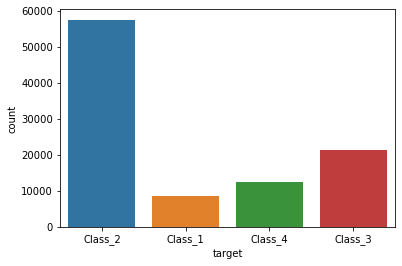

In [9]:
sns.countplot(x = train["target"])

The target variable in the training dataset is unbalanced with class 2 having a majority of the observations.

In [10]:
columns = list(train.columns)
columns.remove("target")

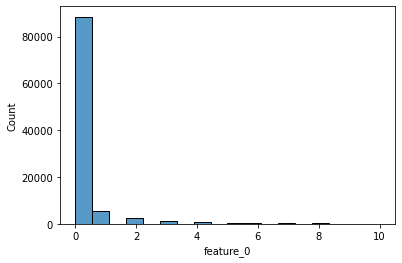

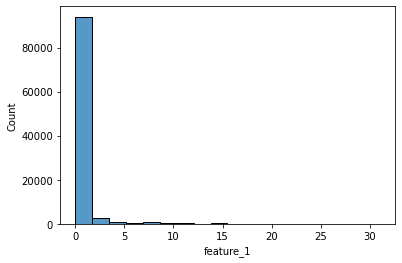

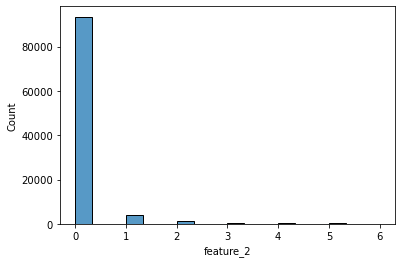

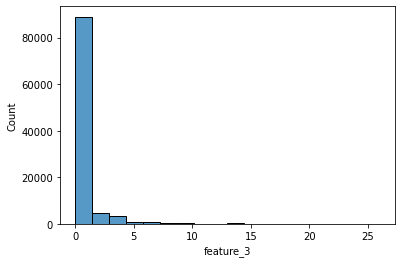

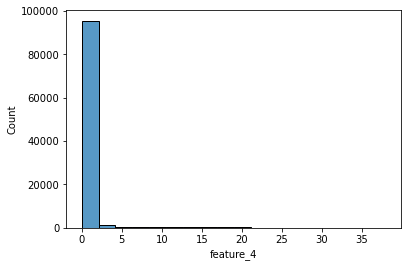

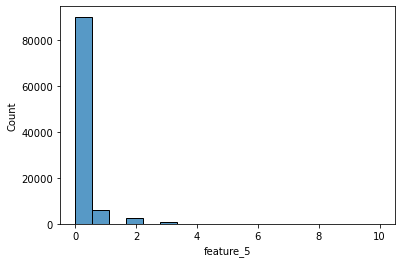

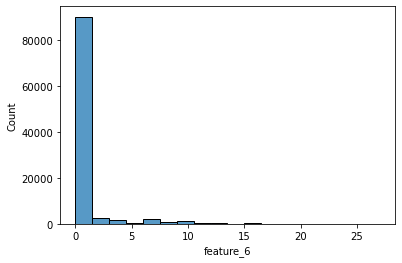

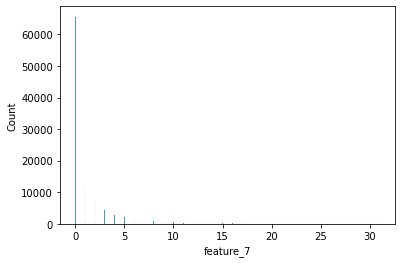

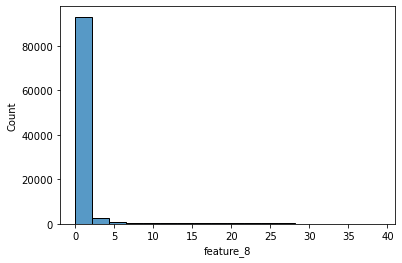

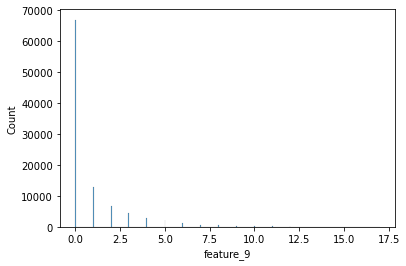

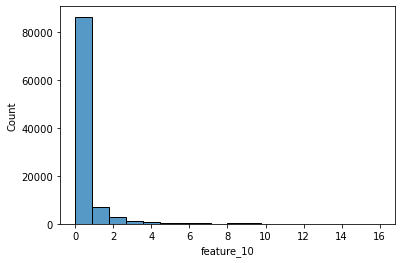

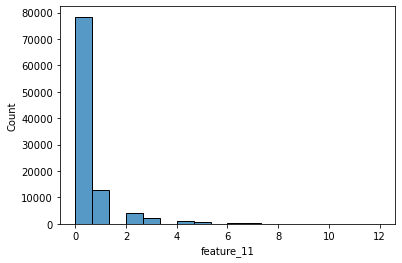

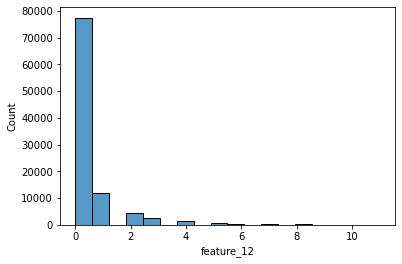

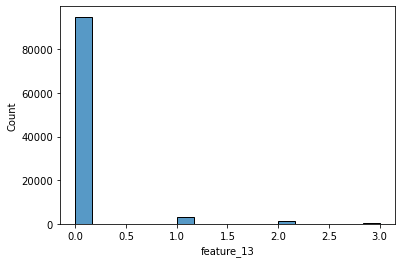

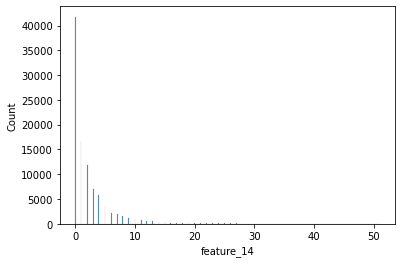

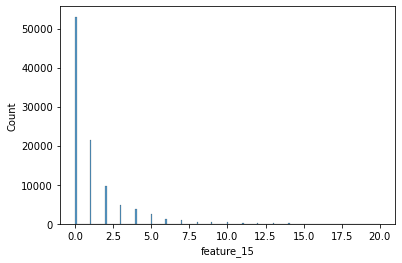

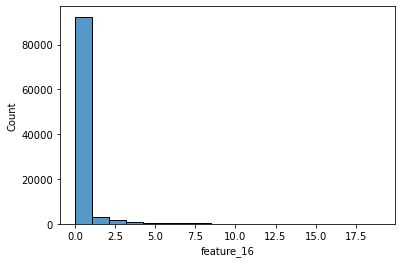

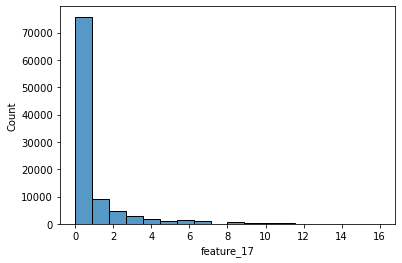

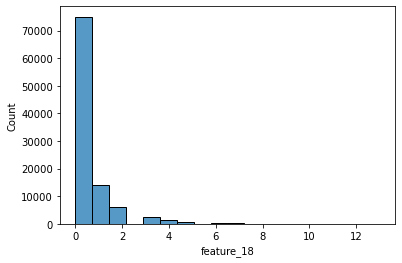

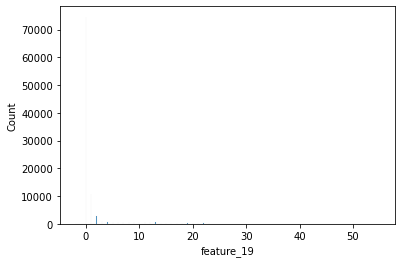

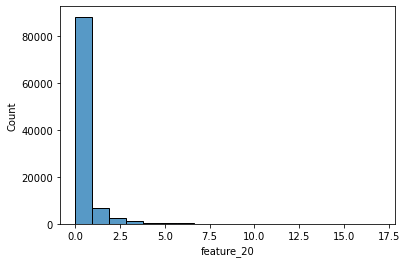

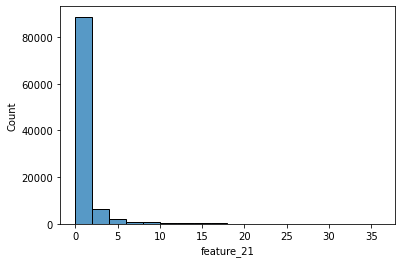

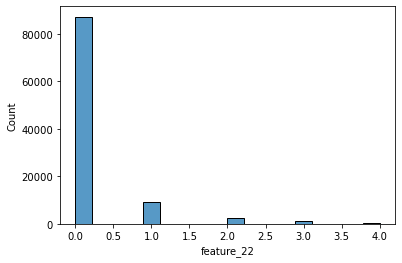

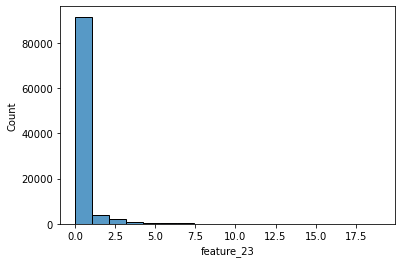

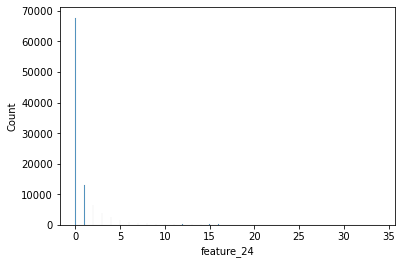

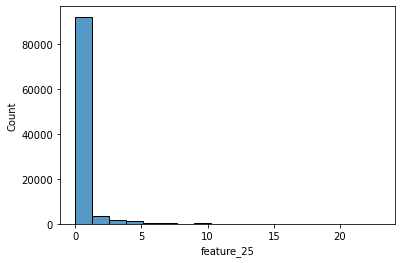

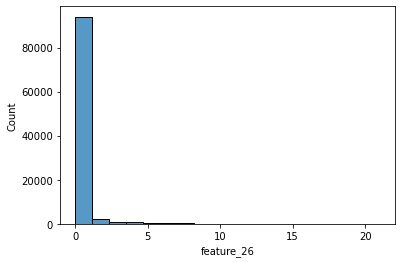

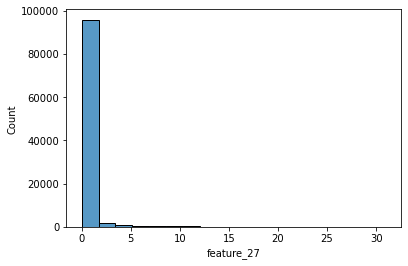

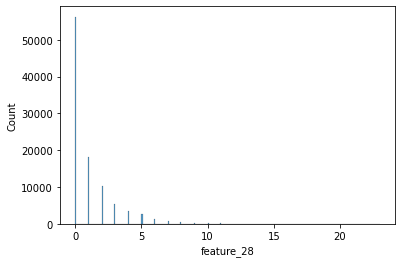

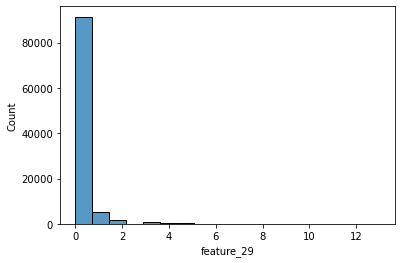

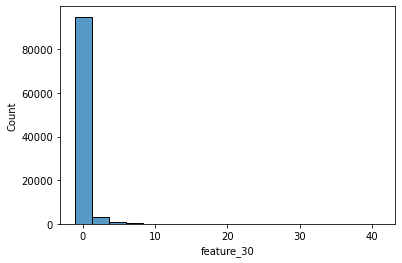

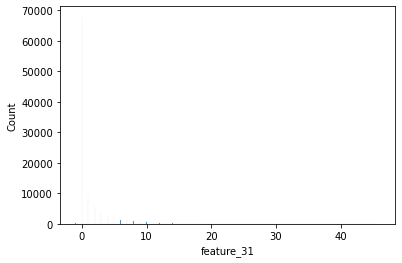

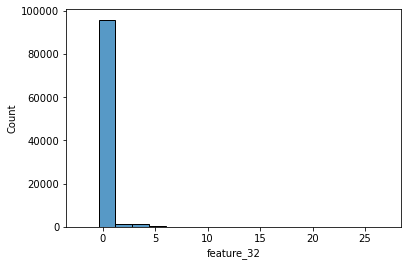

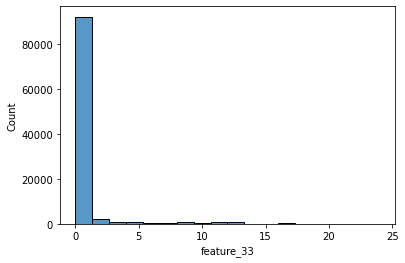

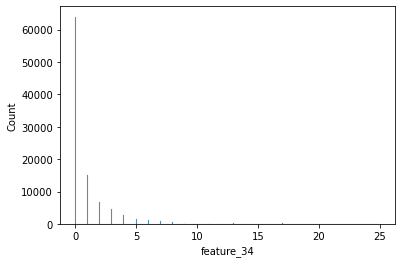

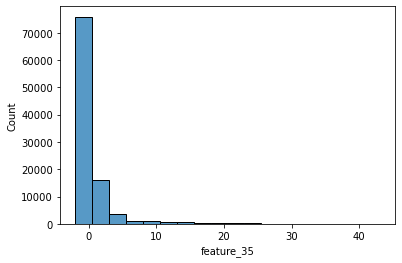

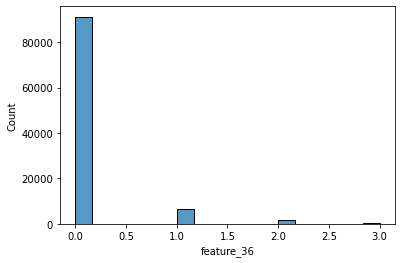

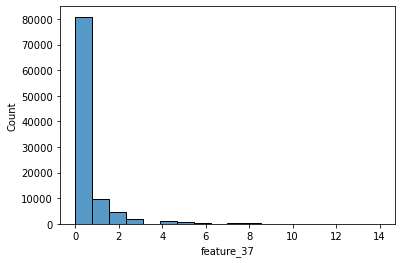

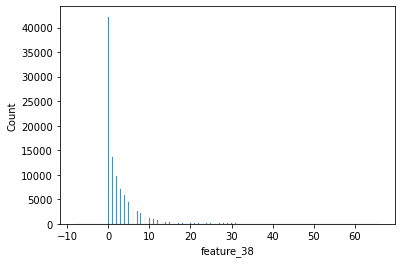

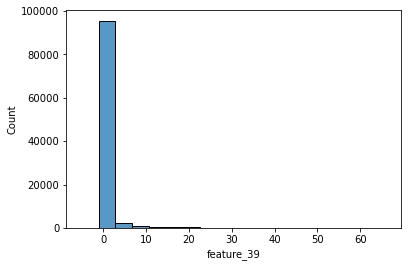

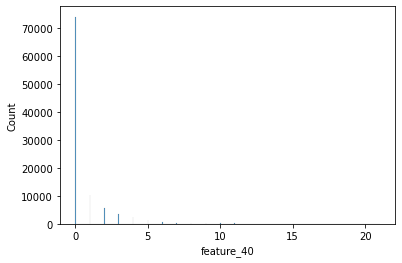

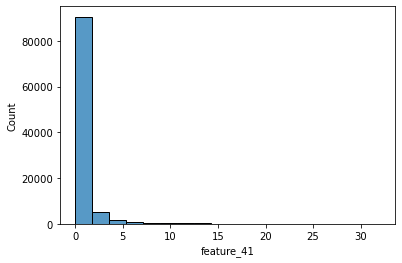

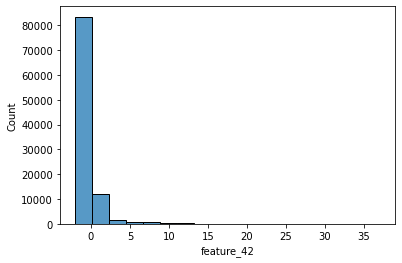

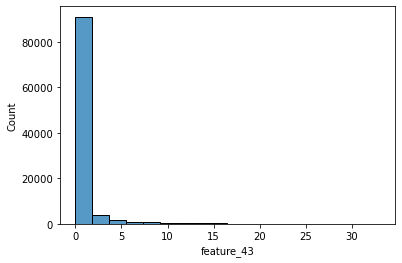

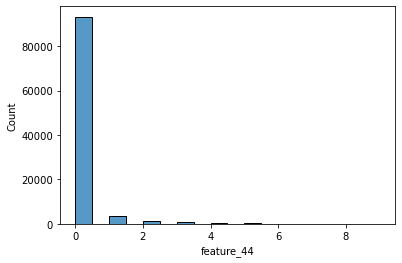

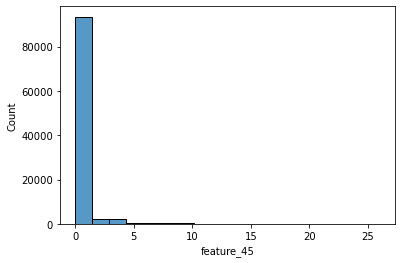

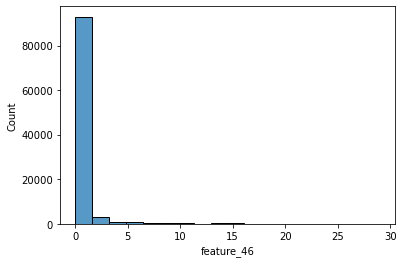

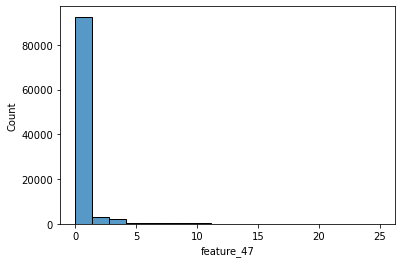

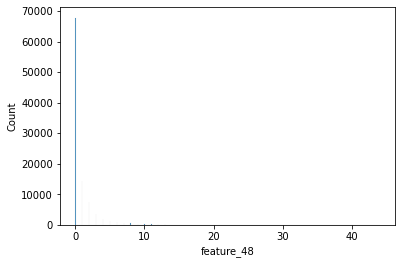

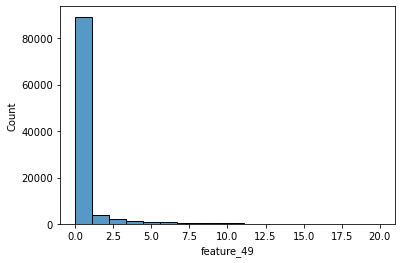

In [11]:
for i in train[columns]:
    sns.histplot(x = i, data = train)
    plt.show()

## Modeling

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [13]:
train["target"].value_counts().sort_values(ascending = False)

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

In [14]:
X = train.drop("target", axis = 1)
y = train["target"]

### PCA

In [15]:
pca = PCA(n_components = 20)

In [16]:
pca_X = pca.fit_transform(X)

In [17]:
pca.explained_variance_ratio_.sum()

0.7896721405039989

### Label Encode

In [18]:
le = LabelEncoder()

In [19]:
y_transformed = le.fit_transform(y)

### Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = .3, random_state = 42)

In [21]:
unique, counts = np.unique(y_train, return_counts = True)
print (unique, counts)

[0 1 2 3] [ 6004 40221 14877  8898]


In [22]:
model = XGBClassifier(random_state = 42, use_label_encoder = False)

In [23]:
xgboost_param_grid = {"model__n_estimators": [250, 500],
                      "model__learning_rate": [0.01, 0.1, 0.2],
                      "model__max_depth": [2, 4, 6, 8, 10],
                      "model__min_child_weight": [1, 2, 3]}

In [24]:
pipeline = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("model", model)
])

In [25]:
clf = GridSearchCV(pipeline, param_grid = xgboost_param_grid, cv = 5, n_jobs = 2)

In [26]:
clf.fit(X_train, y_train)

[17:01:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                

In [27]:
clf.best_params_

{'model__learning_rate': 0.2,
 'model__max_depth': 2,
 'model__min_child_weight': 3,
 'model__n_estimators': 500}

In [28]:
y_predictions = clf.predict(X_test)
print(np.unique(y_predictions))
print(np.unique(y_test))

[1 2 3]
[0 1 2 3]


In [29]:
accuracy_score(y_test, y_predictions)

0.58

## On Test Data for competition

In [33]:
competition_predictions = clf.predict_proba(test)
competition_predictions

array([[0.08287202, 0.6444597 , 0.14658447, 0.12608382],
       [0.07629857, 0.7176786 , 0.12533182, 0.08069099],
       [0.09715806, 0.63569987, 0.17242917, 0.09471286],
       ...,
       [0.08706675, 0.5150893 , 0.22393334, 0.17391063],
       [0.08905738, 0.5814249 , 0.16675289, 0.16276486],
       [0.06622097, 0.5953799 , 0.19682615, 0.14157297]], dtype=float32)

In [34]:
prob_df = pd.DataFrame(competition_predictions, columns = ["Class_1", "Class_2", "Class_3", "Class_4"])
prob_df

,Class_1,Class_2,Class_3,Class_4
0,0.082872,0.644460,0.146584,0.126084
1,0.076299,0.717679,0.125332,0.080691
2,0.097158,0.635700,0.172429,0.094713
3,0.085457,0.556753,0.266435,0.091355
4,0.078353,0.623067,0.186193,0.112387
...,...,...,...,...
49995,0.094126,0.670538,0.189709,0.045626
49996,0.080713,0.664875,0.121592,0.132820
49997,0.087067,0.515089,0.223933,0.173911
49998,0.089057,0.581425,0.166753,0.162765


In [35]:
submission_df = pd.DataFrame({"id": test_id, "Class_1": prob_df.iloc[:,0], "Class_2": prob_df.iloc[:,1], "Class_3": prob_df.iloc[:,2],
             "Class_4": prob_df.iloc[:,3]})

In [36]:
submission_df.to_csv("submission.csv", index = False)